In [1]:
#Importando as bibliotecas
import hydrobr
import geopandas
import contextily as cx
import folium
from plotly.offline import plot

In [2]:
# Obtendo dados de precipitação
precStation = hydrobr.get_data.ANA.list_prec_stations()

# Visualizando a tabela
precStation.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [50]:
# Filtrando para São Paulo
precSP = precStation[precStation['State'] == 'SÃO PAULO']

# Visualizando o resultado do filtro
precSP.head()

,Name,Code,Type,DrainageArea,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
1728,ESTRADA DO CUNHA,58030000,1,796.0,58,CUNHA,SÃO PAULO,ANA,-22.9939,-45.0439,1934/03/21,2019/12/31,86,0.1,82,4.7
1729,FAZENDA CUME,58033000,1,94.5,58,CUNHA,SÃO PAULO,DAEE-SP,-23.0056,-44.9144,1958/10/01,1972/12/17,15,2.1,11,26.7
1730,BAIRRO FAXINAL,58035000,1,47.3,58,LAGOINHA,SÃO PAULO,DAEE-SP,-23.0736,-45.2000,1959/03/10,1975/02/19,17,0.5,14,17.6
1731,SÃO LUÍS DO PARAITINGA,58040000,1,1950.0,58,SÃO LUÍS DO PARAITI,SÃO PAULO,ANA,-23.2386,-45.3067,1988/02/13,2019/12/31,32,0.3,27,15.6
1732,SÃO LUÍS DO PARAITINGA,58040100,1,1940.0,58,SÃO LUÍS DO PARAITI,SÃO PAULO,ANA,-23.2167,-45.3000,1930/08/18,1974/12/31,45,0.0,44,2.2


In [51]:
# Transformando a tabela em um geodata frame

gdfSP = geopandas.GeoDataFrame(precSP,
                                geometry= geopandas.points_from_xy(precSP.Longitude, precSP.Latitude))
                            
#Definindo sistema de coordenadas
gdfSP = gdfSP.set_crs('epsg:4326')

c:\anaconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [52]:
# Transformando para webmercator
gdfSP_wm = gdfSP.to_crs(epsg=3857)

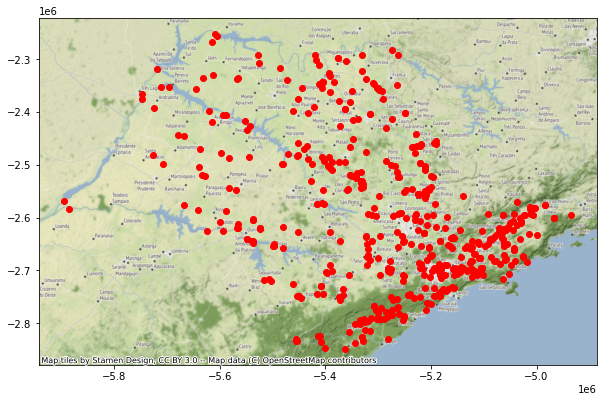

In [54]:
# Plotando os dados
ax = gdfSP_wm.plot(figsize=(10,10), color='red')

#Adicionando mapa base
cx.add_basemap(ax)

In [55]:
gdfSP_wm.head()

,Name,Code,Type,DrainageArea,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD,geometry
1728,ESTRADA DO CUNHA,58030000,1,796.0,58,CUNHA,SÃO PAULO,ANA,-22.9939,-45.0439,1934/03/21,2019/12/31,86,0.1,82,4.7,POINT (-5014264.011 -2631280.962)
1729,FAZENDA CUME,58033000,1,94.5,58,CUNHA,SÃO PAULO,DAEE-SP,-23.0056,-44.9144,1958/10/01,1972/12/17,15,2.1,11,26.7,POINT (-4999848.137 -2632695.877)
1730,BAIRRO FAXINAL,58035000,1,47.3,58,LAGOINHA,SÃO PAULO,DAEE-SP,-23.0736,-45.2000,1959/03/10,1975/02/19,17,0.5,14,17.6,POINT (-5031640.984 -2640921.743)
1731,SÃO LUÍS DO PARAITINGA,58040000,1,1950.0,58,SÃO LUÍS DO PARAITI,SÃO PAULO,ANA,-23.2386,-45.3067,1988/02/13,2019/12/31,32,0.3,27,15.6,POINT (-5043518.774 -2660898.888)
1732,SÃO LUÍS DO PARAITINGA,58040100,1,1940.0,58,SÃO LUÍS DO PARAITI,SÃO PAULO,ANA,-23.2167,-45.3000,1930/08/18,1974/12/31,45,0.0,44,2.2,POINT (-5042772.933 -2658245.958)


In [60]:
gdfSP_wm.to_csv('estaco.csv')

In [61]:
# Criando mapa com base no OSM
map = folium.Map(location = [-21.9000, -48.1333], tiles='OpenStreetMap', zoom_start = 7)

map

In [57]:
#adicionando as estações no mapa

#fazendo uma lista com os itens
lat = list(gdfSP['Latitude'])
long = list(gdfSP['Longitude'])
cidade = list(gdfSP['City'])
nome = list(gdfSP['Name'])
inicio = list(gdfSP['StartDate'])
fim = list(gdfSP['EndDate'])

fg = folium.FeatureGroup(name = 'my map')

#looping para plotar
for lat, long, cidade, nome, inicio, fim in zip(lat, long, cidade, nome, inicio, fim):
    fg.add_child(folium.Marker(location = [lat, long], popup='<b> Name: </b>' + nome + '<br> <b> Cidade: </b>' + cidade + '<br> <b> Início</b>' + inicio+ '<br> <b> Fim: </b>' + fim))
map.add_child(fg)

In [59]:
#Fazer filtro para baixar dados da cidade de DEscalvado

dataDownload_ = gdfSP[gdfSP['City'] == 'DESCALVADO']
dataDownload.head()

,Name,Code,Type,DrainageArea,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD,geometry


In [33]:
DescalStation = dataDownload.Code.to_list()
DescalStation

['02147037', '02147039', '02147043', '02147118', '02147119']

In [34]:
#Baixando os dados
downloaded = hydrobr.get_data.ANA.prec_data(DescalStation)

100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


In [35]:
downloaded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30833 entries, 1936-01-01 to 2020-05-31
Freq: D
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   02147037  22344 non-null  float64
 1   02147039  18740 non-null  float64
 2   02147043  22475 non-null  float64
 3   02147118  6602 non-null   float64
 4   02147119  6574 non-null   float64
dtypes: float64(5)
memory usage: 1.4 MB


In [40]:
gantt_fig = hydrobr.Plot.gantt(downloaded)

#updating layout
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Year',
    yaxis_title = 'Station Code'
)

plot(gantt_fig, filename='gantt' + '.html')

'gantt.html'

In [41]:
downloaded.head()

,02147037,02147039,02147043,02147118,02147119
1936-01-01,NaN,0.0,NaN,NaN,NaN
1936-01-02,NaN,15.1,NaN,NaN,NaN
1936-01-03,NaN,8.0,NaN,NaN,NaN
1936-01-04,NaN,10.5,NaN,NaN,NaN
1936-01-05,NaN,0.0,NaN,NaN,NaN


In [43]:
downloaded.to_csv('pluviometria.csv')

## Dados Fluviometrias

In [49]:
# Obtendo dados de precipitação
flowStation = hydrobr.get_data.ANA.list_flow_stations()

# Visualizando a tabela
flowStation.head()

,Name,Code,Type,DrainageArea,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,BORJA,10064000,1,115000.0,10,PERU,PERU,SENAMHI-PERU,-4.4700,-77.5500,1986/02/02,2013/03/15,28,27.6,17,39.3
1,SAN REGIS,10070500,1,316000.0,10,PERU,PERU,SENAMHI-PERU,-4.5100,-73.9500,1994/05/16,2005/10/17,12,0.1,10,16.7
2,REQUENA,10074800,1,4738.0,10,PERU,PERU,SENAMHI-PERU,-5.0300,-73.8300,1984/10/25,2005/10/17,22,8.6,15,31.8
3,TAMISHIYACU,10075000,1,8985.0,10,PERU,PERU,SENAMHI-PERU,-4.0036,-73.1611,1983/10/02,2010/09/13,28,5.0,23,17.9
4,FRANCISCO DE ORELLAN,10080900,1,NaN,10,PERU,PERU,SENAMHI-PERU,-0.4731,-76.9825,2001/01/02,2005/10/29,5,0.1,3,40.0
